<h1 style="border: 1.5px solid #ccc; 
           padding: 8px 12px; 
           color:#56BFCB;"
    >
    <center> <br/>
        Lista de Exercícios 5a <br/>
        <span style="font-size:18px;"> Guilherme Esdras </span>
    </center>
</h1>

---

<b>
    <center>
        Imports
    </center>
</b>

In [1]:
import numpy as np
import pandas as pd
from scipy import optimize as opt

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-poster')

import sympy as sp
sp.init_printing()

---

<div class="alert alert-block alert-info" style="color:#20484d;">
    <b>Exercicio 1:</b> Implemente os algoritmos da iteração de ponto fixo, Newton-Raphson e secante usando somente a biblioteca Numpy.
</div>

**Funções de teste:**

In [2]:
g_aula = lambda x: np.exp(-x)
g_aula_x0 = 0

fn_youtube = lambda x: np.cos(x) - np.sin(x)
fD_youtube = lambda x: -np.sin(x) - np.cos(x)
er_youtube = 0.01
x0_youtube = 0
x1_youtube = np.pi/2

f_aula = lambda x: np.sin(x) - x
f_aula_x1 = 0.7
f_aula_x0 = 0.8

<div class="alert alert-block alert-info" style="color:Blue;">
    Método da Iteração de Ponto Fixo
</div> 

In [3]:
def ponto_fixo(f, x0, maxiter=1000, xtol=1e-10, verbose=True, r_tb=False, p_tb=False):

    ''' Opcional... '''
    if r_tb or p_tb: tb = []
        
    i = 0 # contador de iterações
    
    while i < maxiter:
        # enquanto tanto o erro quanto o número de iterações não extrapolarem os limites estabelecidos...
        
        y = f(x0) # calcula f(x0) e atribui a y
        
        # calcula o erro abs
        erro = np.abs(x0 - y)
        
        ''' Opcional... ''' 
        if r_tb or p_tb: tb.append([]); tb[i].append(x0); tb[i].append(y); tb[i].append(erro); tb[i].append(xtol);
        
        if erro < xtol:
            msg = f'Raiz encontrada: {x0} | Em {i} iterações'
            
            if verbose:
                print('-'*len(msg))
                print(msg)
                print('-'*len(msg))
            
            ''' Opcional... '''
            if p_tb:
                print(pd.DataFrame(tb, columns=["x0", "f(x0)", "Erro", "xtol"]))
                print('-'*len(msg))
            ''' ----------- '''
            
            # retorna a raiz e o número de iterações
            if r_tb:
                return x0, i, tb
            else:
                return x0, i
        
        x0 = y # atualiza o valor de x0 com o atual y
        i += 1 # incrementa contador
    
    if verbose: print("Número de iterações extrapolou o limite sem encontrar a raíz!")
    if r_tb: return False, False, tb
    return None # saiu do while sem encontrar uma solução

In [4]:
x, y, tb = ponto_fixo(g_aula, g_aula_x0, xtol=1e-1, r_tb=True)
pd.DataFrame(tb, columns=["x0", "f(x0)", "Erro", "xtol"])

----------------------------------------------------
Raiz encontrada: 0.6062435350855974 | Em 5 iterações
----------------------------------------------------


,x0,f(x0),Erro,xtol
0,0.000000,1.000000,1.000000,0.1
1,1.000000,0.367879,0.632121,0.1
2,0.367879,0.692201,0.324321,0.1
3,0.692201,0.500474,0.191727,0.1
4,0.500474,0.606244,0.105770,0.1
5,0.606244,0.545396,0.060848,0.1


<div class="alert alert-block alert-info" style="color:Blue;">
    Método Newton-Raphson
</div> 

In [5]:
def newton_raphson(f, fD, x, tol=1e-10, maxiter=500, verbose=False, r_tb=False, p_tb=False):
    
    Xk = x # o x da primeira iteração recebe o x de entrada
    k = 0 # contador de iterações
    
    ''' Opcional... '''
    if r_tb or p_tb: tb = []
    
    while k < maxiter:
        # enquanto o número de iterações não extrapolarem o limite estabelecido...
        
        ''' Opcional... ''' 
        if r_tb or p_tb: tb.append([]);
        
        f_Xk = f(Xk) # calcula f(x) do x atual (dessa k-ézima iteração)
        fD_Xk = fD(Xk) # calcula a derivada f'(x) do x atual (dessa k-ézima iteração)
        
        ''' Opcional... ''' 
        if r_tb or p_tb: tb[k].append(Xk); tb[k].append(f_Xk); tb[k].append(fD_Xk);
        
        # se a derivada for 0, não há o que fazer
        if fD_Xk == 0:
            if verbose: print("Derivada é == 0. Divisão por zero. Sem soluções possíveis!")
            return None
        
        # atualiza o valor de Xk+1 (x da próxima k-ézima iteração)
        newton_div = f_Xk / fD_Xk
        Xk1 = Xk - newton_div
        
        ''' Opcional... ''' 
        if r_tb or p_tb: tb[k].append(newton_div); tb[k].append(Xk1);
        
        erro = np.abs( Xk1 - Xk ) # calcula o erro relativo
        
        ''' Opcional... ''' 
        if r_tb or p_tb: tb[k].append(erro);
        
        # se o erro for menor ou igual a tolerância, retorna o resultado
        if erro <= tol:
            msg = f'Raiz encontrada: {Xk1} | Em {k} iterações'
            
            if verbose:
                print('-'*len(msg))
                print(msg)
                print('-'*len(msg))
            
            ''' Opcional... '''
            if p_tb:
                print(pd.DataFrame(tb, columns=["Xk", "f(Xk)", "f(Xk)", "f(Xk)/f'(Xk)", "Xk+1", "Erro"]))
                print('-'*len(msg))
            ''' ----------- '''
            
            # retorna a raiz e o número de iterações
            if r_tb:
                return Xk1, k, tb
            else:
                return Xk1, k, False
        
        Xk = Xk1 # atualiza o valor do x para a próxima iteração
        k += 1 # incrementa o contador
    
    if verbose: print("Número de iterações extrapolou o limite sem encontrar a raíz!")
    if r_tb: return False, False, tb
    return None # saiu do while sem encontrar uma solução

In [6]:
x, k, tb = newton_raphson(fn_youtube, fD_youtube, x0_youtube, er_youtube, verbose=True, r_tb=True)
pd.DataFrame(tb, columns=["Xk", "f(Xk)", "f(Xk)", "f(Xk)/f'(Xk)", "Xk+1", "Erro"])

----------------------------------------------------
Raiz encontrada: 0.7853981759997019 | Em 2 iterações
----------------------------------------------------


,Xk,f(Xk),f(Xk),f(Xk)/f'(Xk),Xk+1,Erro
0,0.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000
1,1.000000,-0.301169,-1.381773,0.217958,0.782042,0.217958
2,0.782042,0.004746,-1.414206,-0.003356,0.785398,0.003356


<div class="alert alert-block alert-info" style="color:Blue;">
    Método da Secante
</div> 

In [7]:
def secante(f, x0, x1, tol=1e-10, maxiter=500, verbose=True, r_tb=False, p_tb=False):
    
    if f(x0) * f(x1) >= 0:
        if verbose: print("Incapaz de prosseguir!")
        return None
    
    ''' Opcional... '''
    if r_tb or p_tb: tb = []
    
    erro = None
    k = 0
    
    while k < maxiter:
        
        ''' Opcional... ''' 
#         if r_tb or p_tb: tb.append([]);
        
        fX1 = f(x1)
        fX0 = f(x0)
        
        # calcula o valor intermediário
        Xk = (x0 * fX1 - x1 * fX0) / (fX1 - fX0)
        
        # atualiza valor de x
        x = fX0 * f(Xk);

        # verifica se x é a raiz da equação, em caso positivo, retorna Xk e o número de iterações
        if (x == 0):
            if verbose: print(f"Encontrou a raiz {Xk} em {k} iterações!")
            return Xk, k
        
        else:
            # atualiza os valores do intervalo
            x0 = x1;
            x1 = Xk;
            
            Xk1 = Xk
            
            erro = abs(Xk1 - Xk)
            
            if erro <= tol:
                if verbose: print(f"Encontrou a raiz {Xk} em {k} iterações!")
                return Xk1, k # retorna a raiz e o número de iterações
                
            # update number of iteration
            k += 1
    
    if verbose: print(f"Número de iterações extrapolou o limite sem encontrar a raíz! Valor final foi {Xk1}")
    return None # saiu do while sem encontrar uma soluçãoint("Número de iterações extrapolou o limite sem encontrar a raíz!")

In [8]:
secante(fn_youtube, x0_youtube, x1_youtube, 0.01, verbose=True)

Encontrou a raiz 0.7853981633974483 em 0 iterações!


---

<div class="alert alert-block alert-info" style="color:#20484d;">
    <b>Exercicio 2:</b> Use a iteração de ponto fixo simples para localizar a raiz de $f(x)=2 sin(\sqrt{x})−x$, tendo $x_0 = 0,5$ e adotando como critério de parada o erro $e_a ≤ 0,001\%$.
</div>

In [9]:
ex2_f = lambda x: ( 2 * np.sin(np.sqrt(x)) - x )
ex2_x0 = 0.5
ex2_tol = 0.001

In [10]:
ponto_fixo(ex2_f, ex2_x0, xtol=ex2_tol)

---------------------------------------------------
Raiz encontrada: 0.768018090595916 | Em 4 iterações
---------------------------------------------------


In [11]:
opt.fixed_point(ex2_f, ex2_x0, xtol=ex2_tol, maxiter=3)

array(0.76864886)

---

<div class="alert alert-block alert-info" style="color:#20484d;">
    <b>Exercicio 3:</b> Determine a maior raiz real de $f(x)=2x^3 − 11.7x^2 + 17.7x − 5$.
</div>

In [12]:
# Definindo f(x)
ex3_f = lambda x: 2 * x**3 - 11.7 * x**2 + 17.7 * x - 5

sp.var('x')
sp.Lambda(x, ex3_f(x)) # 'printando' a função de forma simbólica

In [13]:
# ex3_fD = lambda x: 2*x**3 - 11.7*x**2 + 17.7*x - 5
sp.var('x')

# Calculando f'(x)
ex3_fD_sym = lambda x: eval(sp.ccode(sp.diff(ex3_f(x), x)))

sp.Lambda(x, ex3_fD_sym(x)) # 'printando' a função de forma simbólica

In [14]:
ex3_fD = lambda x: 6*x**2 - 23.4*x + 17.7

<div class="alert alert-block alert-info" style="color:#20484d;">
    <b>a)</b> Graficamente;
</div>

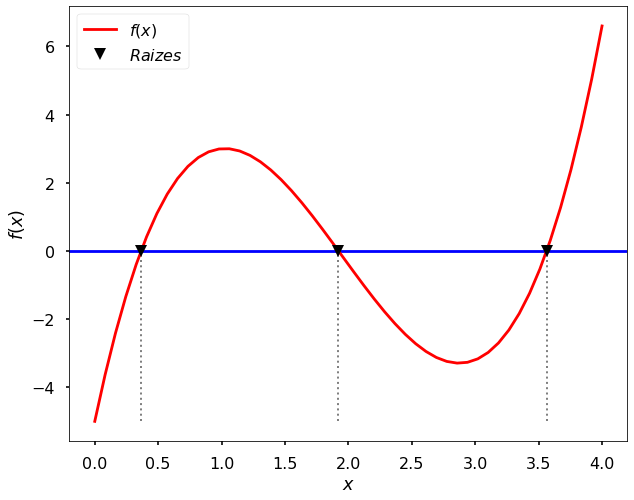

In [15]:
x = np.linspace(0, 4, 50)

y = ex3_f(x)

raiz1 = opt.root(ex3_f, 0)
raiz2 = opt.root(ex3_f, 2)
raiz3 = opt.root(ex3_f, 4)
raizes = np.array([raiz1.x, raiz2.x, raiz3.x])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

plt.vlines(x=raiz1.x, ymin=ex3_f(0), ymax=0, colors='gray', ls=':', lw=2)
plt.vlines(x=raiz2.x, ymin=ex3_f(0), ymax=0, colors='gray', ls=':', lw=2)
plt.vlines(x=raiz3.x, ymin=ex3_f(0), ymax=0, colors='gray', ls=':', lw=2)

ax.axhline(0, color='b')

ax.plot(x, ex3_f(x), 'r', label="$f(x)$")
ax.plot(raizes, ex3_f(raizes), 'kv', label="$Raizes$")

ax.legend(loc='best')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')

plt.show()

Analisando o gráfico plotado, podemos notar que a maior raíz real está entre 3.5 e 4.0.

<div class="alert alert-block alert-info" style="color:#20484d;">
    <b>b)</b> Pelo método da iteração de ponto fixo (três iterações, $x_0=3$) (certifique-se de desenvolver uma solução que convirja para a raiz);
</div>

In [16]:
ponto_fixo(ex3_f, 3, 3)

Número de iterações extrapolou o limite sem encontrar a raíz!


In [17]:
try: opt.fixed_point(ex3_f, 3, maxiter=3)
except RuntimeError as re: print(str(re))

Failed to converge after 3 iterations, value is 3.7022048269565255


<div class="alert alert-block alert-info" style="color:#20484d;">
    <b>c)</b> Pelo método de Newton-Raphson (três iterações, $x_0=3$);
</div>

In [18]:
opt.root_scalar(ex3_f, fprime=ex3_fD, x0=3, maxiter=3, method='newton')

      converged: False
           flag: 'convergence error'
 function_calls: 6
     iterations: 3
           root: 3.7929344806432264

<div class="alert alert-block alert-info" style="color:#20484d;">
    <b>d)</b> Pelo método da secante (três iterações, $x_{−1}=3$, $x_0=4$).
</div>

In [19]:
secante(ex3_f, 3, 4, 3)

Encontrou a raiz 3.326530612244898 em 0 iterações!


---

<div class="alert alert-block alert-info" style="color:#20484d;">
    <b>Exercicio 4:</b> Compare os métodos da bisseção, falsa posição, do ponto fixo, de Newton-Raphson e da secante, localizando a raiz das seguintes equações:
</div>

<div class="alert alert-block alert-warning">
    <p><b>Para as avaliações, deve-se considerar:</b></p>
    <ul>
        <li>o número máximo de iterações de todos os métodos testados não pode ultrapassar 200;</li>
        <li>a tolerância deve ser de $10^{-10}$;</li>
        <li>para os métodos abertos, escolha os limites do intervalo, respectivamente como $x_{?1}$ e $x_0$.</li>
    </ul>
    <p><b>Para cada método, estamos interessados em comparar:</b></p>
    <ul>
        <li>raiz;</li>
        <li>número de iterações até o critério de parada;</li>
        <li>se houve erro de convergência;</li>
        <li>tempo de cálculo (procure como calcular tempo de execução usando jupyter notebooks, como %timeit).</li>
    </ul>
</div>

In [20]:
# Constantes
ex4_maxit = 200
ex4_tol = 1e-10

---

Método da Falsa Posição:

In [21]:
def regula_falsi(f, xl, xu, tol=1e-10, maxit=10000):
    
    if (f(xl) * f(xu) >= 0):
        return -1
    
    i = 0
    x = xl
    erro, x_ant = 1, x
    
    while erro > tol and i < maxit:
        
        x = xu - ( ( f(xu)*(xl-xu) ) / (f(xl)-f(xu)) )
            
        if f(x) * f(xl) < 0:
            xu = x
        
        else:
            xl = x
            
        erro = np.abs((x - x_ant) / np.abs(x))
        x_ant = x
        i += 1
    
    return ( x, i )

---

<div class="alert alert-block alert-info" style="color:#20484d;">
    <b>a)</b> $f_1(x) = 2x^4 + 4x^3 + 3x^2 - 10x - 15$, com $x^* \in [0, 3]$
</div>

**Definindo $f_1(x)$**

In [22]:
sp.var('x')
f1 = lambda x: 2*x**4 + 4*x**3 + 3*x**2 - 10*x - 15
sp.Lambda(x, f1(x)) # 'printando' a função simbolicamente

**Calculando $f_1'(x)$**

In [23]:
sp.var('x')
f1D = lambda x: eval(sp.ccode(sp.diff(f1(x), x)))
sp.Lambda(x, f1D(x)) # 'printando' a função simbolicamente

In [24]:
f1D_2 = lambda x: 8*x**3 + 12*x**2 + 6*x - 10

**Refatorando $f_1'(x)$**

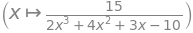

In [25]:
sp.var('x')
f1_ref = lambda x: 15 / (2*(x**3) + 4*(x**2) + 3*(x) - 10)
sp.Lambda(x, f1_ref(x)) # 'printando' a função simbolicamente

**Limites do Intervalo**

In [26]:
f1_x0 = 0
f1_x1 = 3

**$f_1(x)$ - Bisseção**

In [27]:
%timeit opt.root_scalar(f1, method= 'bisect', bracket=[f1_x0, f1_x1], rtol=ex4_tol)
opt.root_scalar(f1, method= 'bisect', bracket=[f1_x0, f1_x1], rtol=ex4_tol)

28.8 µs ± 5.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 37
     iterations: 35
           root: 1.4928787086100783

<p style="font-weight: bold">$f_1(x)$ - Falsa Posição</p>

In [28]:
%timeit regula_falsi(f1, f1_x0, f1_x1, ex4_tol, ex4_maxit)
regula_falsi(f1, f1_x0, f1_x1, ex4_tol, ex4_maxit)

378 µs ± 60.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<p><b>$f_1(x)$ - Ponto Fixo</b></p>

In [29]:
%timeit opt.fixed_point(f1_ref, 1.5, xtol=ex4_tol, maxiter=ex4_maxit)
opt.fixed_point(f1_ref, 1.5, xtol=ex4_tol, maxiter=ex4_maxit)

789 µs ± 126 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


array(1.49287871)

<p><b>$f_1(x)$ - Newton-Raphson</b></p>

In [30]:
%timeit opt.root_scalar(f1, fprime=f1D_2, x0=1, xtol=ex4_tol, maxiter=ex4_maxit, method='newton')
opt.root_scalar(f1, fprime=f1D_2, x0=1, xtol=ex4_tol, maxiter=ex4_maxit, method='newton')

336 µs ± 23.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 7
           root: 1.4928787086636037

<p><b>$f_1(x)$ - Secante</b></p>

In [31]:
%timeit opt.root_scalar(f1, x0=1, x1=f1_x1, method='secant')
opt.root_scalar(f1, x0=1, x1=f1_x1, method='secant')

509 µs ± 86.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 1.4928787086636037

---

<div class="alert alert-block alert-info" style="color:#20484d;">
    <b>b)</b> $f_2(x) = (x + 3)(x + 1)(x - 2)^3$, com $x^* \in [0,5]$
</div>

**Definindo $f_2(x)$**

In [32]:
sp.var('x')
f2 = lambda x: (x + 3)*(x + 1)*(x - 2)**3
sp.Lambda(x, f2(x)) # 'printando' a função simbolicamente

**Refatorando $f_2(x)$**

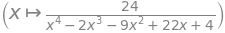

In [33]:
sp.var('x')
f2R = lambda x: 24 / ( (x**4) - 2*(x**3) - 9*(x**2) + 22*x + 4 )
sp.Lambda(x, f2R(x)) # vendo o resultado simbólico

**Calculando $f_2'(x)$**

In [34]:
sp.var('x')
f2D_sym = lambda x: eval(sp.ccode(sp.diff(f2(x), x)))
sp.Lambda(x, f2D_sym(x)) # 'printando' a função simbolicamente

In [35]:
f2D = lambda x: (x - 2)**3 * (x + 1) + (x - 2)**3 * (x + 3) + 3*(x - 2)**2 * (x + 1) * (x + 3)

**Limites do Intervalo**

In [36]:
f2_x0 = 0
f2_x1 = 5

**$f_2(x)$ - Bisseção**

In [37]:
%timeit opt.root_scalar(f2, method= 'bisect', bracket=[f2_x0, f2_x1], rtol=ex4_tol)
opt.root_scalar(f2, method= 'bisect', bracket=[f2_x0, f2_x1], rtol=ex4_tol)

28.4 µs ± 6.51 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 37
     iterations: 35
           root: 1.9999999999708962

**$f_2(x)$ - Falsa Posição**

In [38]:
%timeit regula_falsi(f2, f2_x0, f2_x1, ex4_tol, ex4_maxit)
regula_falsi(f2, f2_x0, f2_x1, ex4_tol, ex4_maxit)

811 µs ± 93.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**$f_2(x)$ - Ponto Fixo**

In [39]:
%timeit opt.fixed_point(f2R, x0=1, xtol=ex4_tol, maxiter=ex4_maxit)
opt.fixed_point(f2R, x0=1, xtol=ex4_tol, maxiter=ex4_maxit)

6.8 ms ± 410 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


array(1.99966007)

**$f_2(x)$ - Newton-Raphson**

In [40]:
%timeit opt.root_scalar(f2, fprime=f2D, x0=1, xtol=ex4_tol, maxiter=ex4_maxit, method='newton')
opt.root_scalar(f2, fprime=f2D, x0=1, xtol=ex4_tol, maxiter=ex4_maxit, method='newton')

1.88 ms ± 139 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


      converged: True
           flag: 'converged'
 function_calls: 110
     iterations: 55
           root: 1.9999999998545246

**$f_2(x)$ - Secante**

In [41]:
%timeit opt.root_scalar(f2, x0=f2_x0, x1=f2_x1, maxiter=ex4_maxit, xtol=ex4_tol, method='secant')
opt.root_scalar(f2, x0=f2_x0, x1=f2_x1, maxiter=ex4_maxit, xtol=ex4_tol, method='secant')

2.48 ms ± 117 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


      converged: True
           flag: 'converged'
 function_calls: 79
     iterations: 78
           root: 2.0000000002448965

---

<div class="alert alert-block alert-info" style="color:#20484d;">
    <b>c)</b> $f_3(x) = 5x^3 + x^2 - e^{1-2x} + cos(x) + 20$, com $x^* \in [-5, 5]$
</div>

**Definindo $f_3(x)$**

In [42]:
sp.var('x')

def f3(x, t=None):
    if t == 'sp':
        return (5*x**3 + x**2 - sp.exp(1-2*x) + sp.cos(x) + 20)
    return (5*x**3 + x**2 - np.exp(1-2*x) + np.cos(x) + 20)

sp.Lambda(x, f3(x, 'sp')) # 'printando' a função simbolicamente

**Refatorando $f_3(x)$**

In [43]:
sp.var('x')

def f3R(x, t=None):
    if t == 'sp':
        return ( 5*x**3 + x**2 - sp.exp(1-2*x) + sp.cos(x) + 20 + x )
    return ( 5*x**3 + x**2 - np.exp(1-2*x) + np.cos(x) + 20 + x )

sp.Lambda(x, f3R(x, 'sp')) # vendo o resultado simbólico

**Calculando $f_3'(x)$**

In [44]:
sp.var('x')

f3D_sym = lambda x: sp.diff(f3(x, 'sp'), x) # calcula a derivada

sp.Lambda(x, f3D_sym(x)) # vendo o resultado simbólico

In [45]:
# aplicando o resultado
def f3D(x, t=None): 
    if t == 'sp':
        return (15*x**2 + 2*x + 2*sp.exp(1-2*x) - sp.sin(x))
    return (15*x**2 + 2*x + 2*np.exp(1-2*x) - np.sin(x))

sp.Lambda(x, f3D(x, 'sp')) # 'printando' a função simbolicamente

**Limites do Intervalo**

In [46]:
f3_x0 = -5
f3_x1 = 5

**$f_3(x)$ - Bisseção**

In [47]:
%timeit opt.root_scalar(f3, method= 'bisect', bracket=[f3_x0, f3_x1], rtol=ex4_tol)
opt.root_scalar(f3, method= 'bisect', bracket=[f3_x0, f3_x1], rtol=ex4_tol)

115 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 39
     iterations: 37
           root: -0.9295604598446516

**$f_3(x)$ - Falsa Posição**

In [48]:
%timeit regula_falsi(f3, f3_x0, f3_x1, ex4_tol, ex4_maxit)
regula_falsi(f3, f3_x0, f3_x1, ex4_tol, ex4_maxit)

4.91 ms ± 609 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**$f_3(x)$ - Ponto Fixo**

In [49]:
%timeit opt.fixed_point(f3R, x0=1, xtol=ex4_tol, maxiter=ex4_maxit)
opt.fixed_point(f3R, x0=1, xtol=ex4_tol, maxiter=ex4_maxit)

25.6 ms ± 3.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


array(-0.92956046)

**$f_3(x)$ - Newton-Raphson**

In [50]:
%timeit opt.root_scalar(f3, fprime=f3D, x0=1, xtol=ex4_tol, maxiter=ex4_maxit, method='newton')
opt.root_scalar(f3, fprime=f3D, x0=1, xtol=ex4_tol, maxiter=ex4_maxit, method='newton')

395 µs ± 90.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 7
           root: -0.9295604598378413

**$f_3(x)$ - Secante**

In [51]:
%timeit opt.root_scalar(f3, x0=f3_x0, x1=f3_x1, maxiter=ex4_maxit, xtol=ex4_tol, method='secant')
opt.root_scalar(f3, x0=f3_x0, x1=f3_x1, maxiter=ex4_maxit, xtol=ex4_tol, method='secant')

974 µs ± 40.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 25
     iterations: 24
           root: -0.9295604598378412

---

<div class="alert alert-block alert-info" style="color:#20484d;">
    <b>d)</b> $f_4(x) = sin(x)x + 4$, com $x^* \in [1, 5]$
</div>

**Definindo $f_4(x)$**

In [52]:
sp.var('x')

def f4(x, t=None):
    if t == 'sp':
        return (sp.sin(x)*x + 4)
    return (np.sin(x)*x + 4)

sp.Lambda(x, f4(x, 'sp')) # 'printando' a função simbolicamente

**Refatorando $f_4(x)$**

In [53]:
sp.var('x')

def f4R(x, t=None):
    if t == 'sp':
        return ( (-4) / sp.sin(x) )
    return ( (-4) / np.sin(x) )

sp.Lambda(x, f4R(x, 'sp')) # vendo o resultado simbólico

**Calculando $f_4'(x)$**

In [54]:
sp.var('x')

f4D_sym = lambda x: sp.diff(f4(x, 'sp'), x) # calcula a derivada

sp.Lambda(x, f4D_sym(x)) # vendo o resultado simbólico

In [55]:
# aplicando o resultado
def f4D(x, t=None): 
    if t == 'sp':
        return (x * sp.cos(x) + sp.sin(x))
    return (x * np.cos(x) + np.sin(x))

sp.Lambda(x, f4D(x, 'sp')) # 'printando' a função simbolicamente

**Limites do Intervalo**

In [56]:
f4_x1 = 1
f4_x0 = 5

**$f_4(x)$ - Bisseção**

In [57]:
%timeit opt.root_scalar(f4, method= 'bisect', bracket=[f4_x0, f4_x1], rtol=ex4_tol)
opt.root_scalar(f4, method= 'bisect', bracket=[f4_x0, f4_x1], rtol=ex4_tol)

55.1 µs ± 2.85 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 36
     iterations: 34
           root: 4.323239543708041

**$f_4(x)$ - Falsa Posição**

In [58]:
%timeit regula_falsi(f4, f4_x0, f4_x1, ex4_tol, ex4_maxit)
regula_falsi(f4, f4_x0, f4_x1, ex4_tol, ex4_maxit)

102 µs ± 648 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**$f_4(x)$ - Ponto Fixo**

In [59]:
%timeit opt.fixed_point(f4R, x0=f4_x0, xtol=ex4_tol, maxiter=ex4_maxit)
opt.fixed_point(f4R, x0=f4_x0, xtol=ex4_tol, maxiter=ex4_maxit)

687 µs ± 51.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


array(4.32323954)

**$f_4(x)$ - Newton-Raphson**

In [60]:
%timeit opt.root_scalar(f4, fprime=f4D, x0=4, xtol=ex4_tol, maxiter=ex4_maxit, method='newton')
opt.root_scalar(f4, fprime=f4D, x0=4, xtol=ex4_tol, maxiter=ex4_maxit, method='newton')

209 µs ± 3.07 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 5
           root: 4.323239543713714

**$f_4(x)$ - Secante**

In [61]:
%timeit opt.root_scalar(f4, x0=f4_x0, x1=f4_x1, maxiter=ex4_maxit, xtol=ex4_tol, method='secant')
opt.root_scalar(f4, x0=f4_x0, x1=f4_x1, maxiter=ex4_maxit, xtol=ex4_tol, method='secant')

267 µs ± 2.57 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 4.323239543713714

---

<div class="alert alert-block alert-info" style="color:#20484d;">
    <b>e)</b> $f_5(x) = (x - 3)^5 ln(x)$, com $x^* \in [2, 5]$
</div>

**Definindo $f_5(x)$**

In [62]:
sp.var('x')

def f5(x, t=None):
    if t == 'sp':
        return ( (x - 3)**5 * sp.ln(x) )
    return ( (x - 3)**5 * np.log(x) )

sp.Lambda(x, f5(x, 'sp')) # 'printando' a função simbolicamente

**Refatorando $f_5(x)$**

In [63]:
sp.var('x')

def f5R(x, t=None):
    if t == 'sp':
        return ( (x-3)**5 * sp.log(x) + x )
    return ( (x-3)**5 * np.log(x) + x )

sp.Lambda(x, f5R(x, 'sp')) # vendo o resultado simbólico

**Calculando $f_5'(x)$**

In [64]:
sp.var('x')

f5D_sym = lambda x: sp.diff(f5(x, 'sp'), x) # calcula a derivada

sp.Lambda(x, f5D_sym(x)) # vendo o resultado simbólico

In [65]:
# aplicando o resultado
def f5D(x, t=None):
    if t == 'sp':
        return ( 5*(x - 3)**4 * sp.log(x) + sp.Pow((x-3),5) / x )
    return ( 5*(x - 3)**4 * np.log(x) + ((x-3)**5 / x) )

sp.Lambda(x, f5D(x, 'sp')) # 'printando' a função simbolicamente

**Limites do Intervalo**

In [66]:
f5_x0 = 2
f5_x1 = 5

**$f_5(x)$ - Bisseção**

In [67]:
%timeit opt.root_scalar(f5, method= 'bisect', bracket=[f5_x0, f5_x1], rtol=ex4_tol)
opt.root_scalar(f5, method= 'bisect', bracket=[f5_x0, f5_x1], rtol=ex4_tol)

46.2 µs ± 3.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 36
     iterations: 34
           root: 2.9999999999417923

**$f_5(x)$ - Falsa Posição**

In [68]:
%timeit regula_falsi(f5, f5_x0, f5_x1, ex4_tol, ex4_maxit)
regula_falsi(f5, f5_x0, f5_x1, ex4_tol, ex4_maxit)

3.24 ms ± 813 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**$f_5(x)$ - Ponto Fixo**

In [69]:
%timeit opt.fixed_point(f5R, x0=2, xtol=10**-9.9, maxiter=ex4_maxit)
opt.fixed_point(f5R, x0=2, xtol=10**-9.9, maxiter=ex4_maxit)

27 ms ± 1.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


array(2.98889825)

**$f_5(x)$ - Newton-Raphson**

In [70]:
%timeit opt.root_scalar(f5, fprime=f5D, x0=f5_x0, xtol=ex4_tol, maxiter=ex4_maxit, method='newton')
opt.root_scalar(f5, fprime=f5D, x0=f5_x0, xtol=ex4_tol, maxiter=ex4_maxit, method='newton')

4.73 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


      converged: True
           flag: 'converged'
 function_calls: 194
     iterations: 97
           root: 2.99999999964898

**$f_5(x)$ - Secante**

In [71]:
%timeit opt.root_scalar(f5, x0=f5_x0, x1=f5_x1, maxiter=ex4_maxit, xtol=ex4_tol, method='secant')
opt.root_scalar(f5, x0=f5_x0, x1=f5_x1, maxiter=ex4_maxit, xtol=ex4_tol, method='secant')

7.79 ms ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


      converged: True
           flag: 'converged'
 function_calls: 139
     iterations: 138
           root: 2.999999999418057

---

<div class="alert alert-block alert-info" style="color:#20484d;">
    <b>f)</b> $f_6(x) = x^{10} - 1$, com $x^* \in [0.8, 1.2]$
</div>

**Definindo $f_6(x)$**

In [72]:
sp.var('x')

f6 = lambda x: x**10 - 1

sp.Lambda(x, f6(x)) # 'printando' a função simbolicamente

**Refatorando $f_6(x)$**

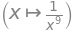

In [73]:
sp.var('x')

f6R = lambda x: 1/(x)**9

sp.Lambda(x, f6R(x)) # vendo o resultado simbólico

**Calculando $f_6'(x)$**

In [74]:
sp.var('x')

f6D_sym = lambda x: eval(sp.ccode(sp.diff(f6(x), x)))

sp.Lambda(x, f6D_sym(x)) # 'printando' a função simbolicamente

In [75]:
f6D = lambda x: 10 * x**9

**Limites do Intervalo**

In [76]:
f6_x0 = 0.8
f6_x1 = 1.2

**$f_6(x)$ - Bisseção**

In [77]:
%timeit opt.root_scalar(f6, method= 'bisect', bracket=[f6_x0, f6_x1], rtol=ex4_tol)
opt.root_scalar(f6, method= 'bisect', bracket=[f6_x0, f6_x1], rtol=ex4_tol)

9.41 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 3
     iterations: 1
           root: 1.0

**$f_6(x)$ - Falsa Posição**

In [78]:
%timeit regula_falsi(f6, f6_x0, f6_x1, ex4_tol, ex4_maxit)
regula_falsi(f6, f6_x0, f6_x1, ex4_tol, ex4_maxit)

136 µs ± 7.35 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**$f_6(x)$ - Ponto Fixo**

In [79]:
%timeit opt.fixed_point(f6R, x0=1, xtol=ex4_tol, maxiter=ex4_maxit)
opt.fixed_point(f6R, x0=1, xtol=ex4_tol, maxiter=ex4_maxit)

157 µs ± 18.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


array(1.)

**$f_6(x)$ - Newton-Raphson**

In [80]:
%timeit opt.root_scalar(f6, fprime=f6D, x0=f6_x0, xtol=ex4_tol, maxiter=ex4_maxit, method='newton')
opt.root_scalar(f6, fprime=f6D, x0=f6_x0, xtol=ex4_tol, maxiter=ex4_maxit, method='newton')

414 µs ± 28.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 20
     iterations: 10
           root: 1.0

**$f_6(x)$ - Secante**

In [81]:
%timeit opt.root_scalar(f6, x0=f6_x0, x1=f6_x1, maxiter=ex4_maxit, xtol=ex4_tol, method='secant')
opt.root_scalar(f6, x0=f6_x0, x1=f6_x1, maxiter=ex4_maxit, xtol=ex4_tol, method='secant')

370 µs ± 3.23 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: 1.0

---